In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('hair_loss.csv')
X = data.drop('hair_fall', axis=1)
y = data.hair_fall

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [5]:
pca = PCA()
pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
pca.fit_transform(X_test)

pca.explained_variance_ratio_

[0.102183   0.10148124 0.10069052 0.10033698 0.09992652 0.09965502
 0.09957524 0.09928667 0.09847635 0.09838846]


array([0.10362688, 0.10157251, 0.10104229, 0.10054686, 0.10024395,
       0.09985885, 0.09928952, 0.09881759, 0.09769956, 0.09730199])

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[971, 866, 894, 786, 698, 821],
       [923, 839, 902, 764, 757, 839],
       [916, 862, 847, 810, 693, 798],
       [960, 849, 908, 742, 722, 812],
       [943, 842, 889, 779, 718, 841],
       [890, 873, 876, 802, 769, 799]])

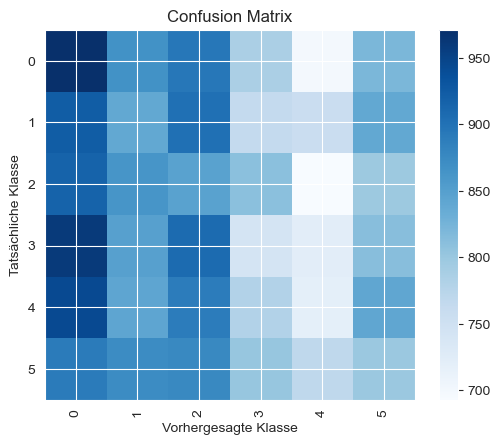

In [8]:
classes = np.unique(y_train)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xticks(rotation='vertical')

plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()

In [9]:
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.17      0.19      0.18      5036
           1       0.16      0.17      0.17      5024
           2       0.16      0.17      0.17      4926
           3       0.16      0.15      0.15      4993
           4       0.16      0.14      0.15      5012
           5       0.16      0.16      0.16      5009

    accuracy                           0.16     30000
   macro avg       0.16      0.16      0.16     30000
weighted avg       0.16      0.16      0.16     30000

